k = -0.006899 per minute
T(20 min) = 86.133333 °F
Time to reach 65°F = 259.70 minutes (~4.33 hours)


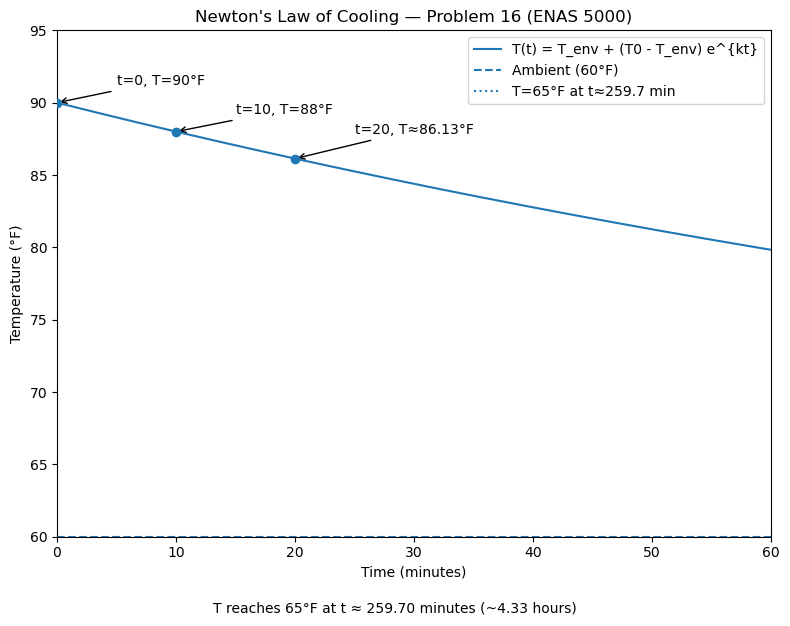

In [2]:
"""
Problem 16 — Newton's Law of Cooling (ENAS 5000)
Clean visualization:
- Focus x-axis on 0–60 minutes
- Show when T reaches 65°F as a vertical dashed line
- Put the 65°F time as a caption below the plot
- Tidy annotation placement
"""

import math
import matplotlib.pyplot as plt

# Parameters
T_env = 60.0   # ambient temperature (°F)
T0 = 90.0      # initial temperature (°F)
T_10 = 88.0    # temperature at t=10 min (°F)
t1 = 10.0      # minutes

# Solve for k from 88 = 60 + (90-60) e^{10k}
k = (1.0 / t1) * math.log((T_10 - T_env) / (T0 - T_env))

# Requested values
t2 = 20.0
T_20 = T_env + (T0 - T_env) * math.exp(k * t2)

T_target = 65.0
t_to_65 = (1.0 / k) * math.log((T_target - T_env) / (T0 - T_env))

print(f"k = {k:.6f} per minute")
print(f"T(20 min) = {T_20:.6f} °F")
print(f"Time to reach 65°F = {t_to_65:.2f} minutes (~{t_to_65/60:.2f} hours)")

# Generate smooth curve (0–60 minutes)
times = [i * 0.1 for i in range(601)]
temps = [T_env + (T0 - T_env) * math.exp(k * t) for t in times]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(times, temps, label="T(t) = T_env + (T0 - T_env) e^{kt}")
plt.axhline(T_env, linestyle="--", label="Ambient (60°F)")

# Mark the crossing time for 65°F with a vertical dashed line
plt.axvline(t_to_65, linestyle=":", label=f"T=65°F at t≈{t_to_65:.1f} min")

# Key points within the 0–60 min window
plt.scatter([0, 10, 20], [T0, T_10, T_20], zorder=5)

# Tidy annotations
plt.annotate("t=0, T=90°F", (0, T0), xytext=(5, 91),
             ha="left", va="bottom", arrowprops=dict(arrowstyle="->"))
plt.annotate("t=10, T=88°F", (10, T_10), xytext=(15, 89),
             ha="left", va="bottom", arrowprops=dict(arrowstyle="->"))
plt.annotate(f"t=20, T≈{T_20:.2f}°F", (20, T_20), xytext=(25, T_20+1.5),
             ha="left", va="bottom", arrowprops=dict(arrowstyle="->"))

# Axes limits to keep the chart balanced
plt.xlim(0, 60)
plt.ylim(60, 95)

plt.title("Newton's Law of Cooling — Problem 16 (ENAS 5000)")
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (°F)")
plt.legend(loc="best")
plt.tight_layout()

# Add a caption below the plot with the 65°F time
plt.figtext(0.5, -0.03,
            f"T reaches 65°F at t ≈ {t_to_65:.2f} minutes (~{t_to_65/60:.2f} hours)",
            ha="center", fontsize=10)

plt.savefig("problem16_plot_clean.png", dpi=200, bbox_inches="tight")
# plt.show()  # Uncomment to display interactively
